In [10]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries

Attaching package: ‘fma’

The following object is masked from ‘package:robustbase’:

    milk

Loading required package: expsmooth
Loading required package: lmtest


In [2]:
elec

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1956  1254  1290  1379  1346  1535  1555  1655  1651  1500  1538  1486  1394
1957  1409  1387  1543  1502  1693  1616  1841  1787  1631  1649  1586  1500
1958  1497  1463  1648  1595  1777  1824  1994  1835  1787  1699  1633  1645
1959  1597  1577  1709  1756  1936  2052  2105  2016  1914  1925  1824  1765
1960  1721  1752  1914  1857  2159  2195  2287  2276  2096  2055  2004  1924
1961  1851  1839  2019  1937  2270  2251  2382  2364  2129  2110  2072  1980
1962  1995  1932  2171  2162  2489  2424  2641  2630  2324  2412  2284  2186
1963  2184  2144  2379  2383  2717  2774  3051  2891  2613  2600  2493  2410
1964  2390  2463  2616  2734  2970  3125  3342  3207  2964  2919  2764  2732
1965  2622  2698  2950  2895  3200  3408  3679  3473  3154  3107  3052  2918
1966  2786  2739  3125  3033  3486  3661  3927  3851  3456  3390  3280  3166
1967  3080  3069  3340  3310  3798  3883  4191  4213  3766  3628  3520  3322

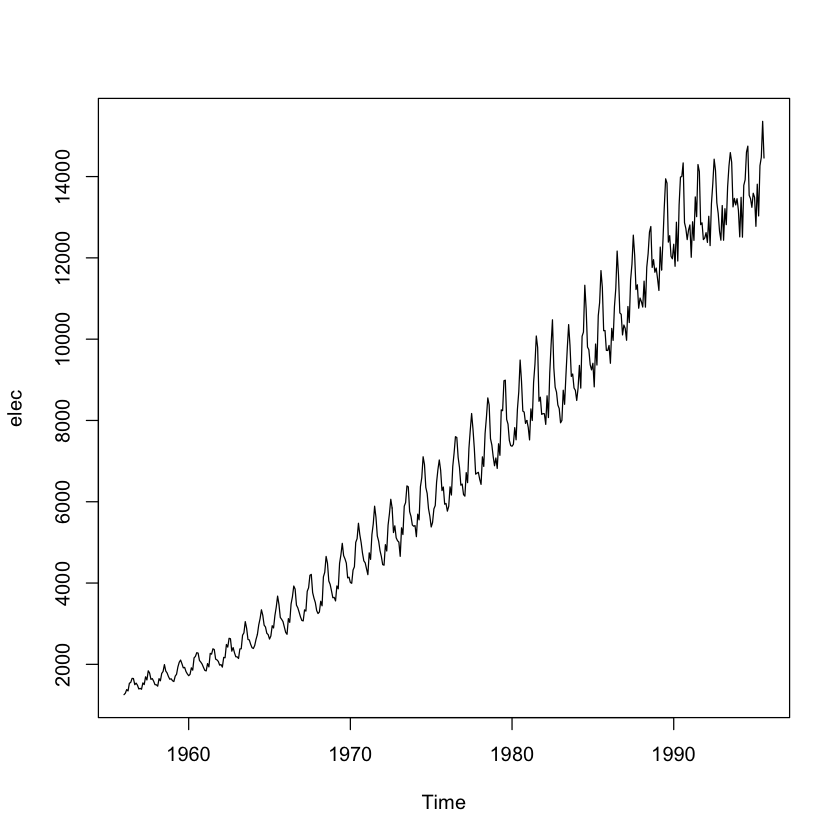

In [3]:
plot(elec)

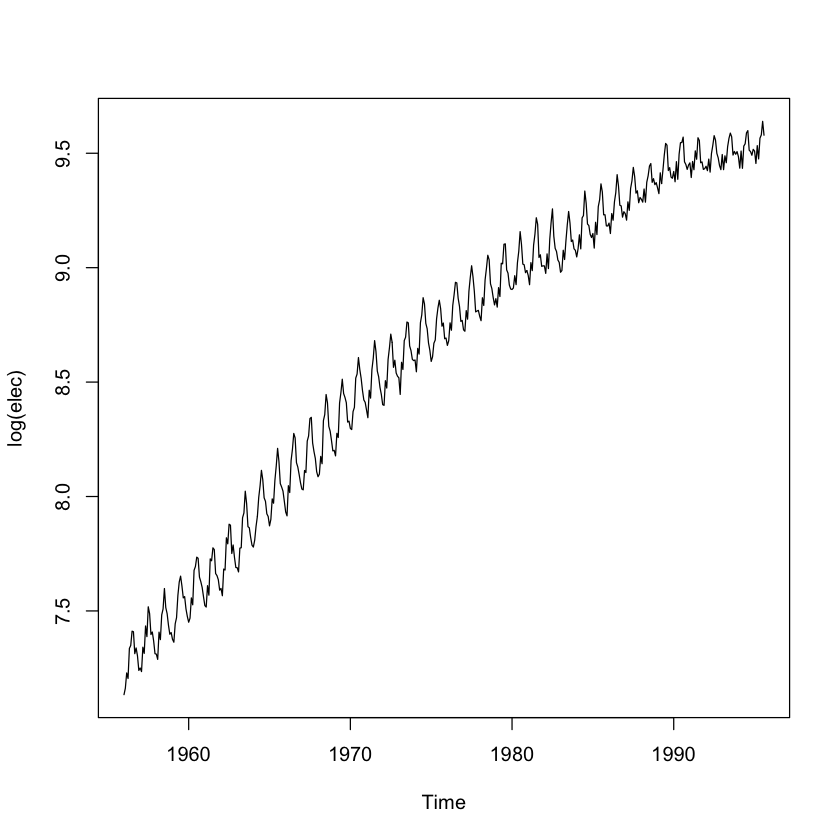

In [4]:
plot(log(elec))

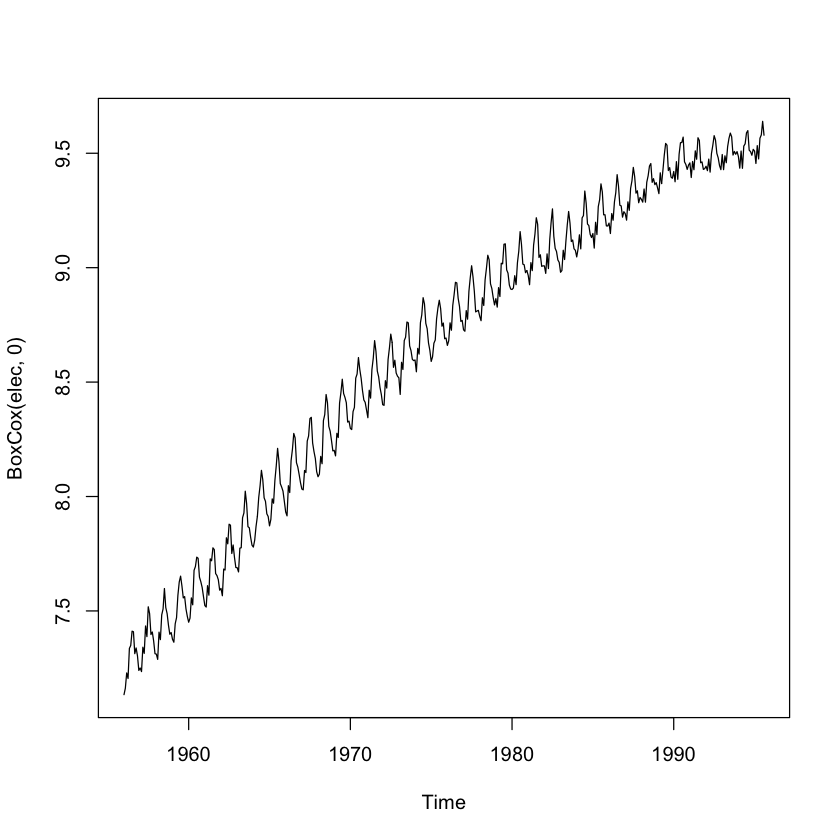

In [6]:
plot(BoxCox(elec, 0))

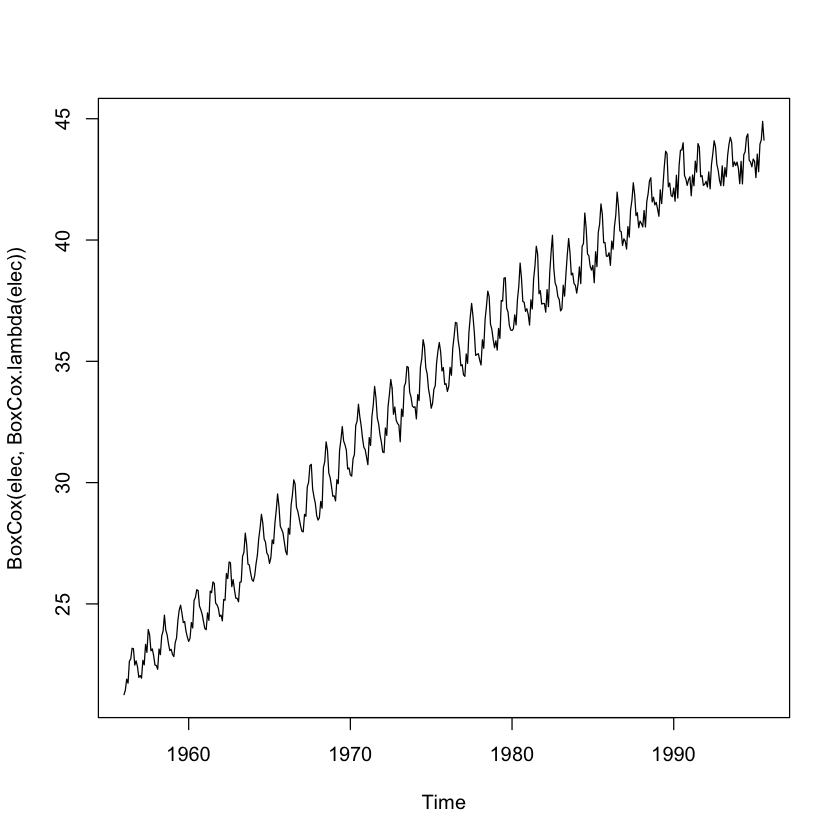

In [10]:
plot(BoxCox(elec, BoxCox.lambda(elec)))

In [1]:
monthdays = rep(c(31,28,31,30,31,30,31,31,30,31,30,31), 14)
monthdays[26 + (4*12)*(0:2)] = 29

In [13]:
summary(monthdays)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.00   30.00   31.00   30.43   31.00   31.00 

In [42]:
ap = AirPassengers
ap_log = log(ap)

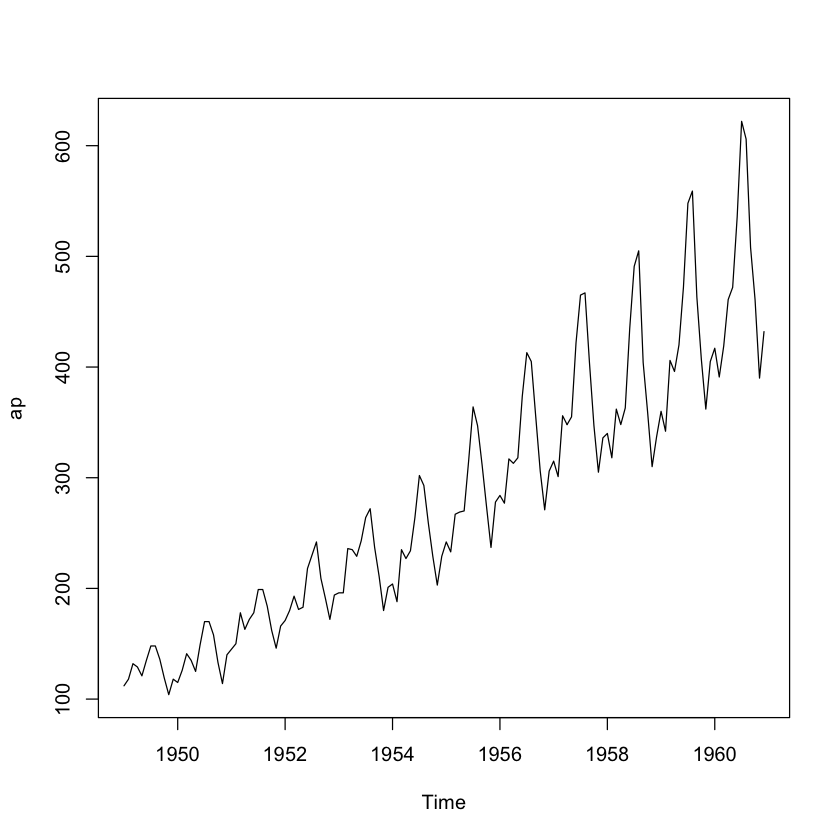

In [43]:
plot(ap)

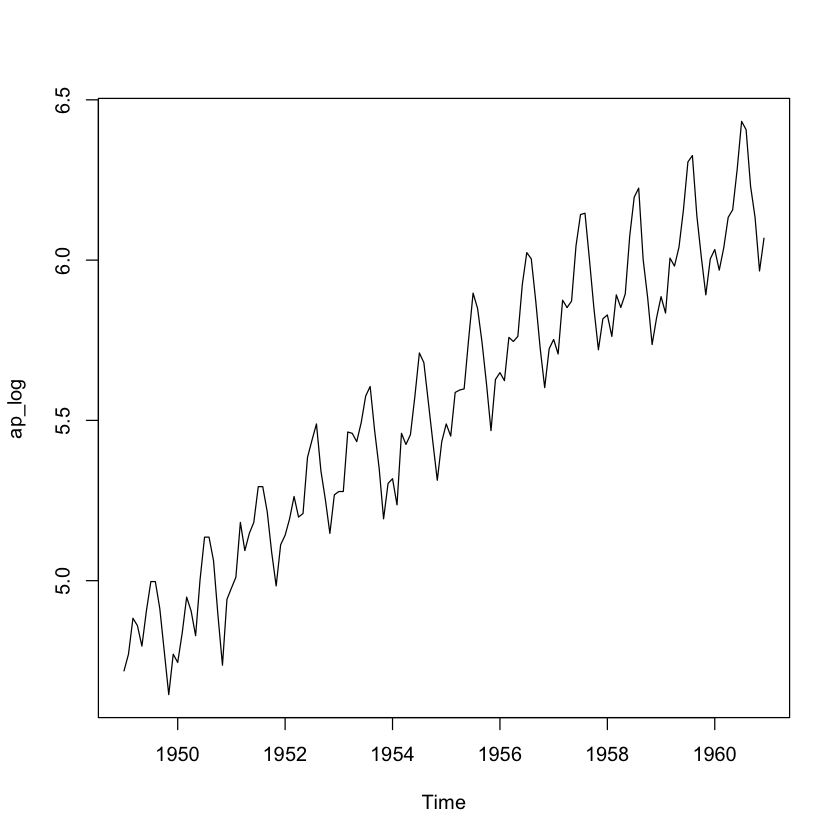

In [45]:
plot(ap_log)

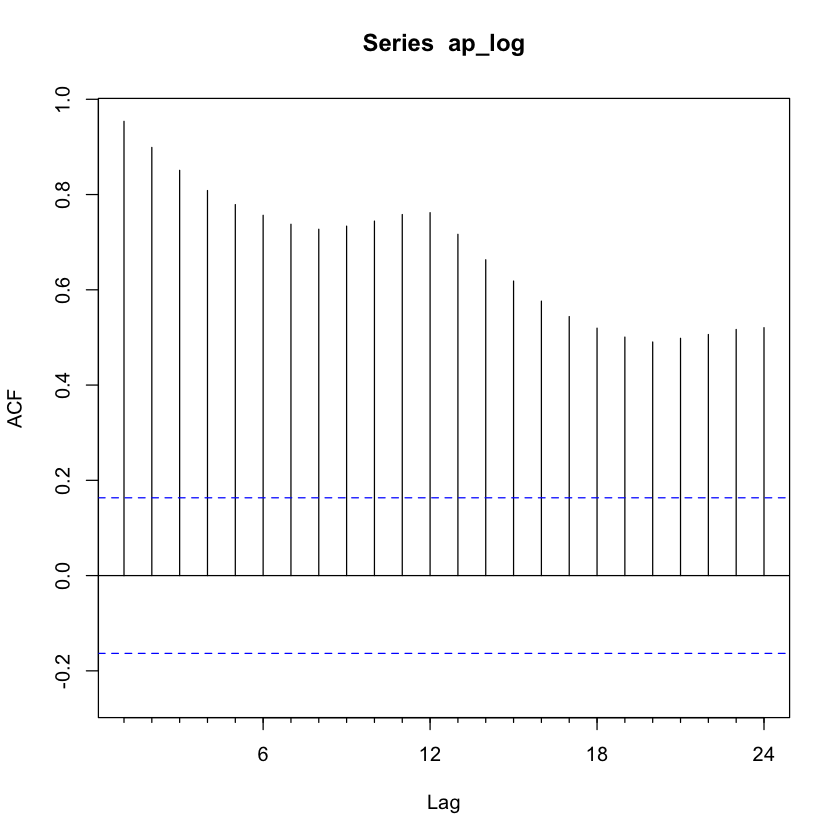

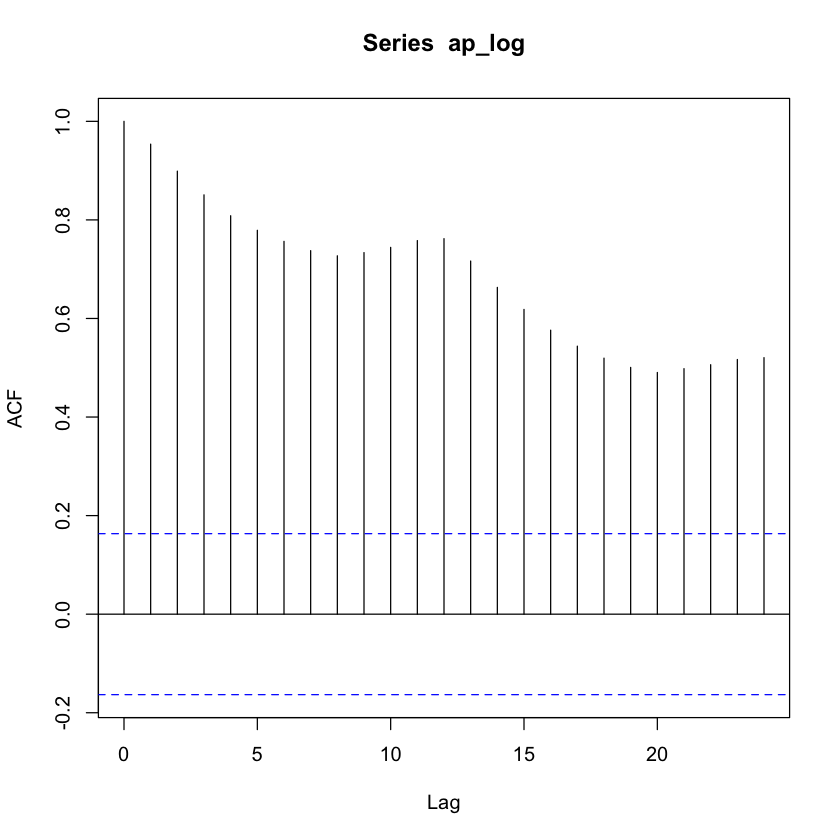

In [46]:
plot(Acf(ap_log))

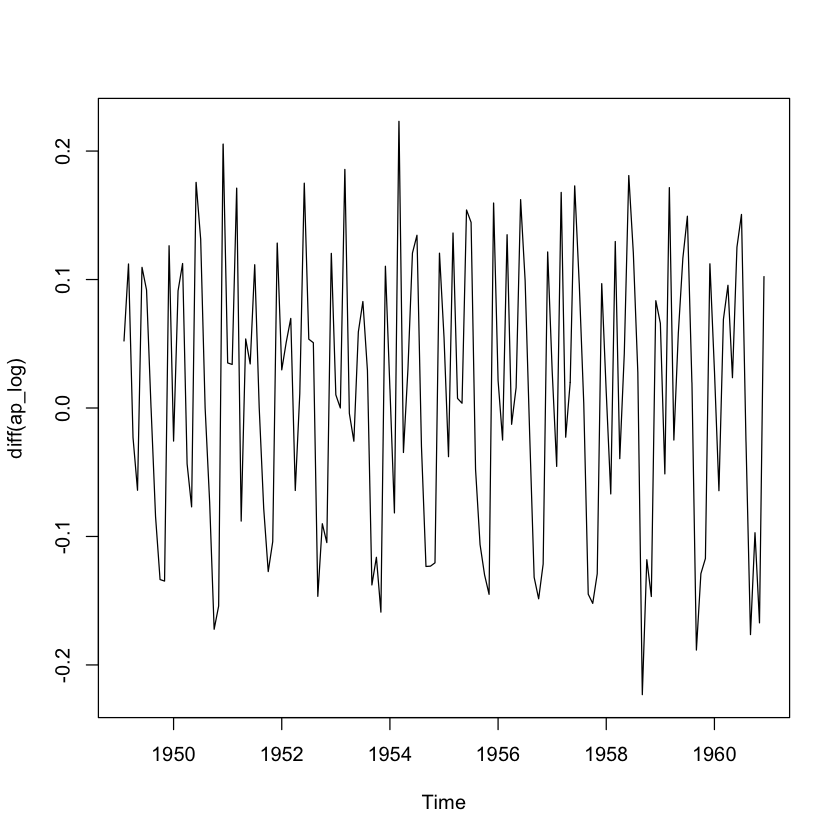

In [47]:
plot(diff(ap_log))

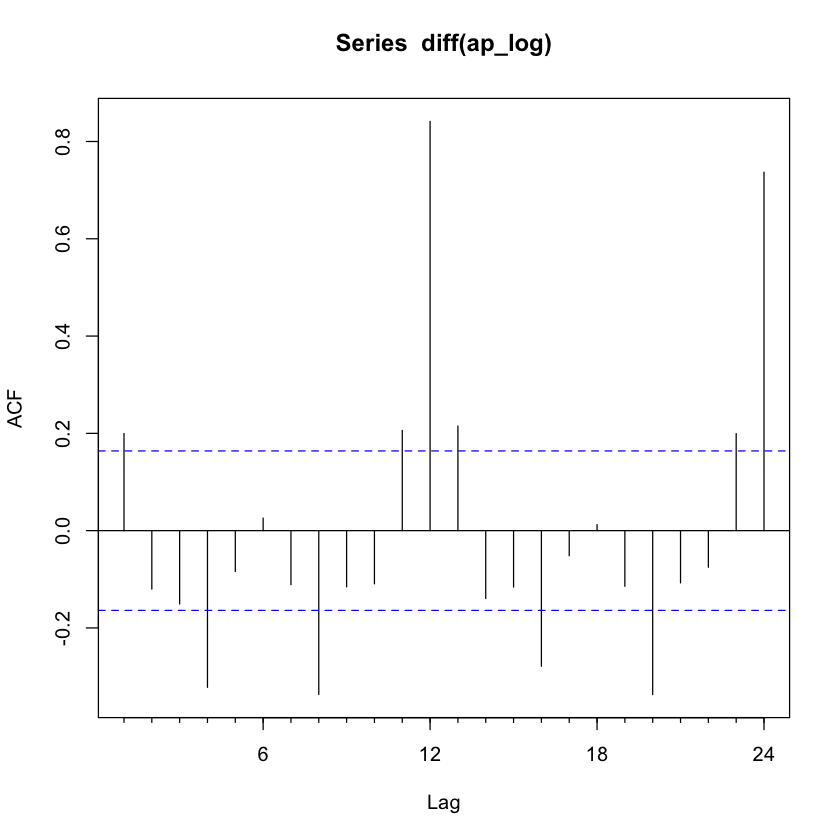

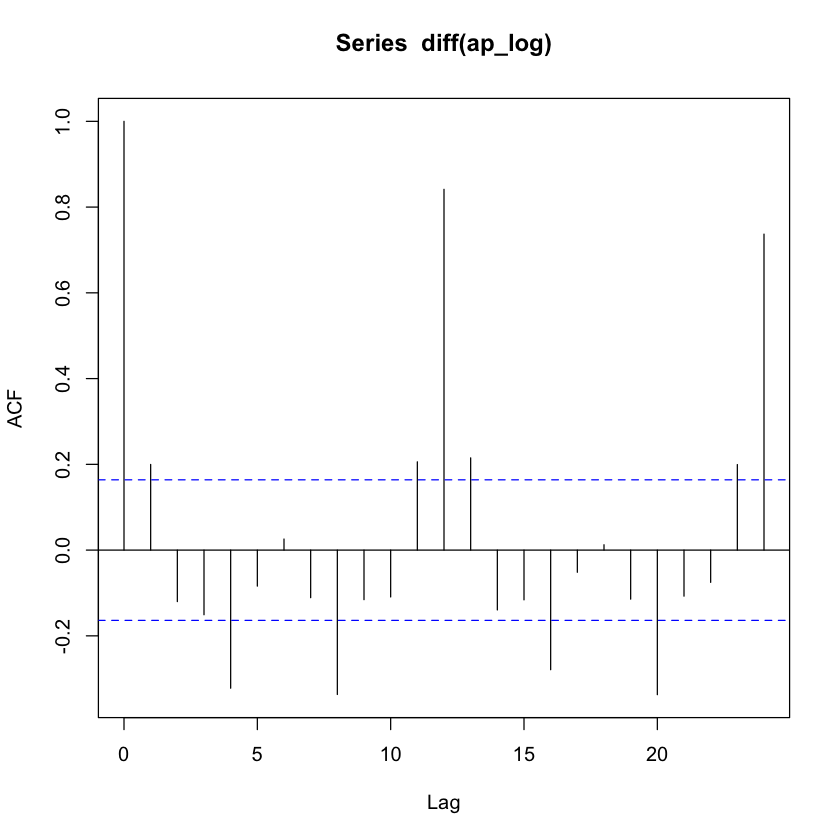

In [50]:
plot(Acf(diff(ap_log)))

In [28]:
Box.test(diff(ap), type = "L", lag = 10)


	Box-Ljung test

data:  diff(ap)
X-squared = 61.328, df = 10, p-value = 2.03e-09


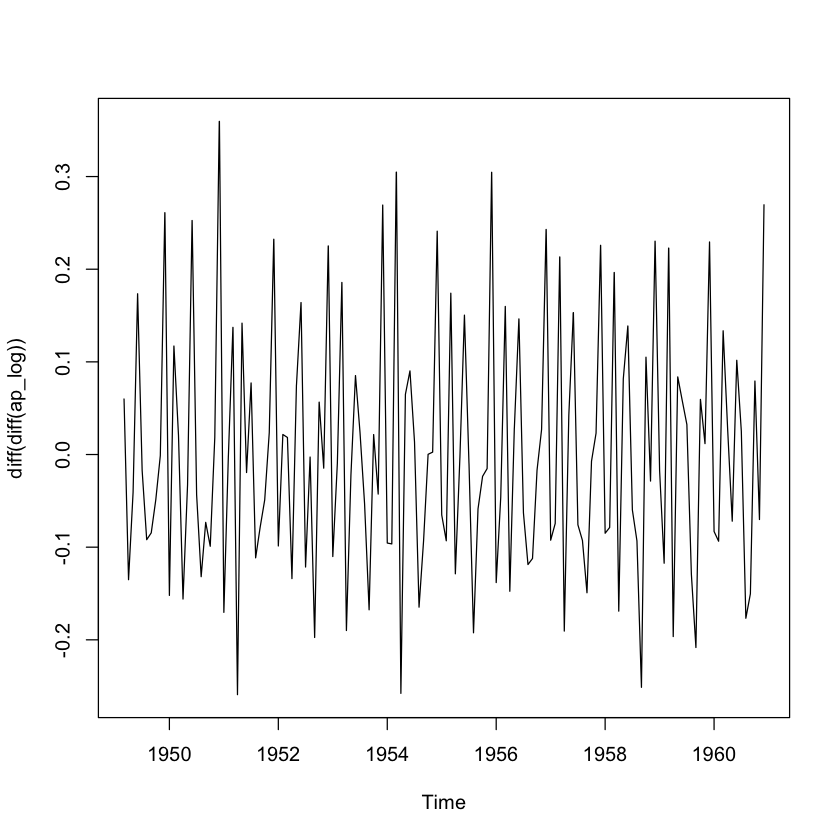

In [51]:
plot(diff(diff(ap_log)))

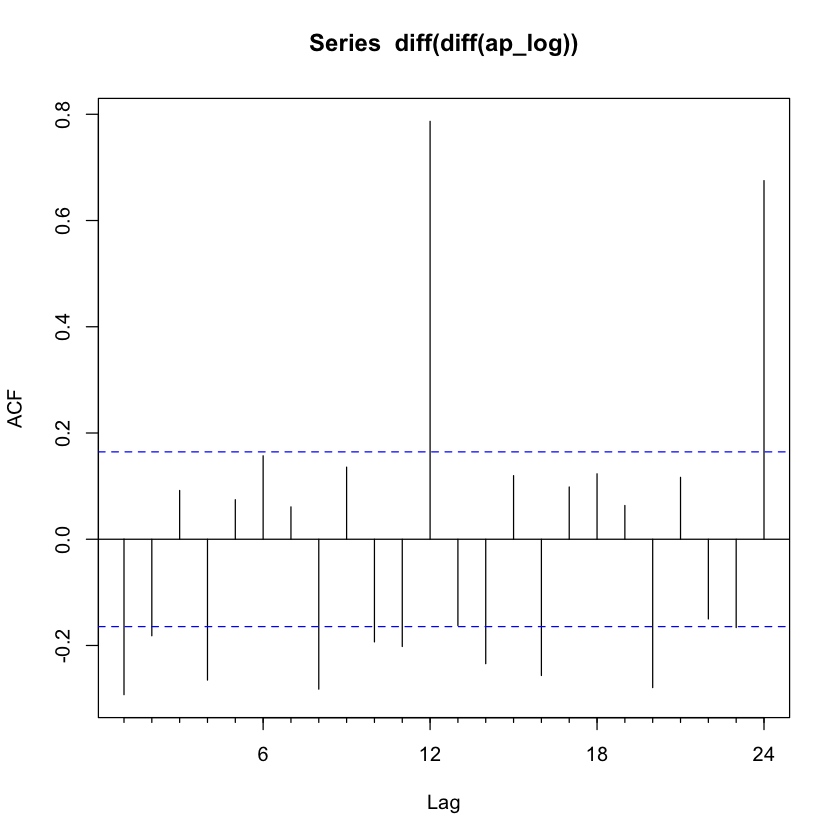

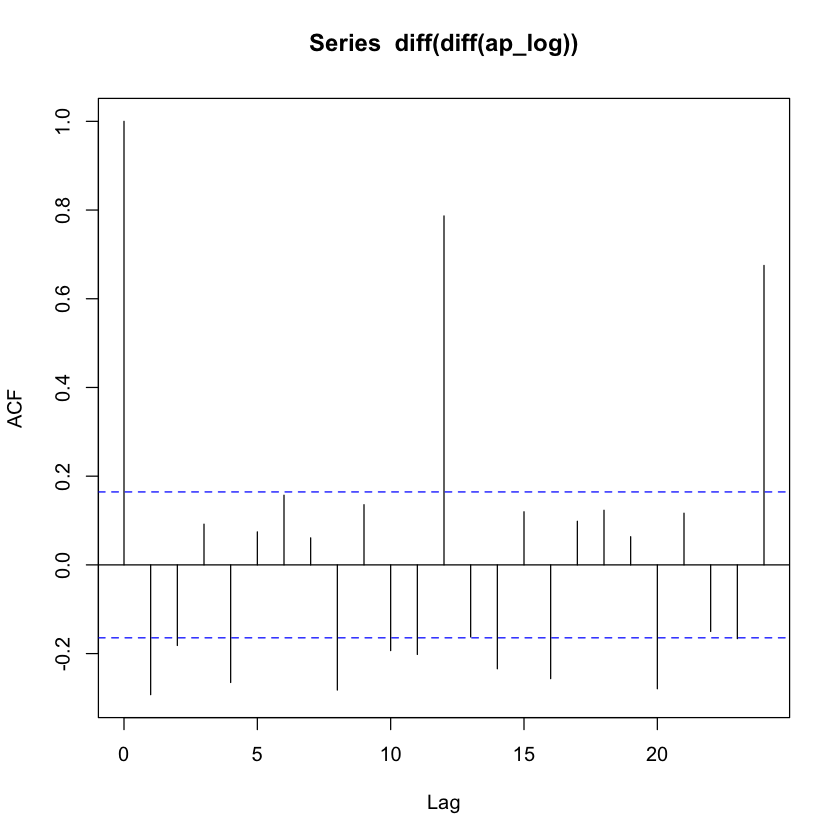

In [53]:
plot(Acf(diff(diff(ap_log))))

In [54]:
sa = seasadj(stl(ap_log, s.window="periodic"))

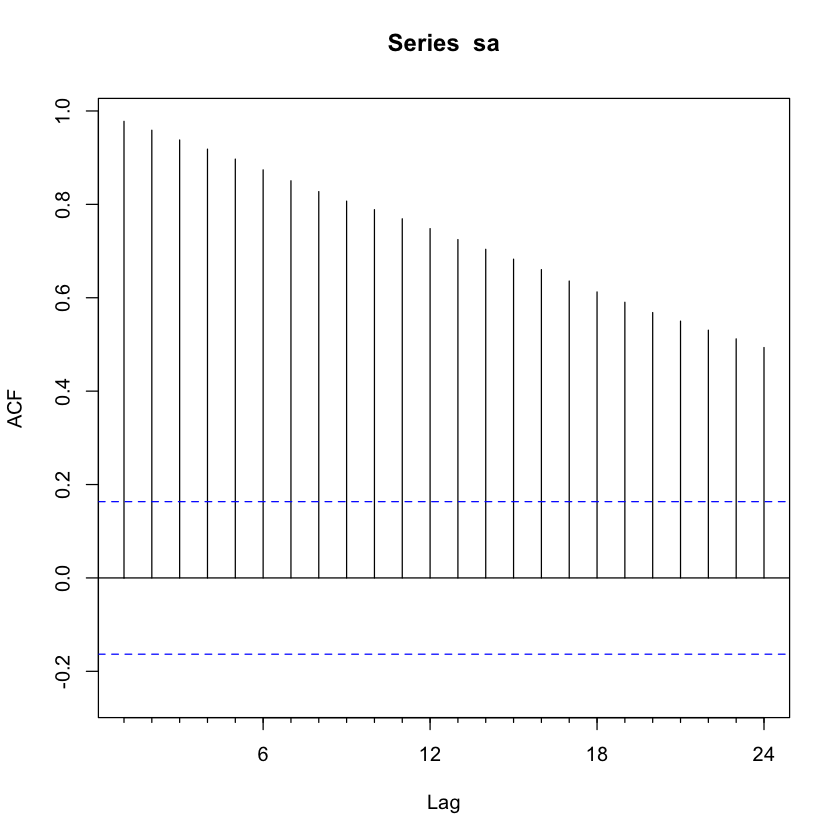

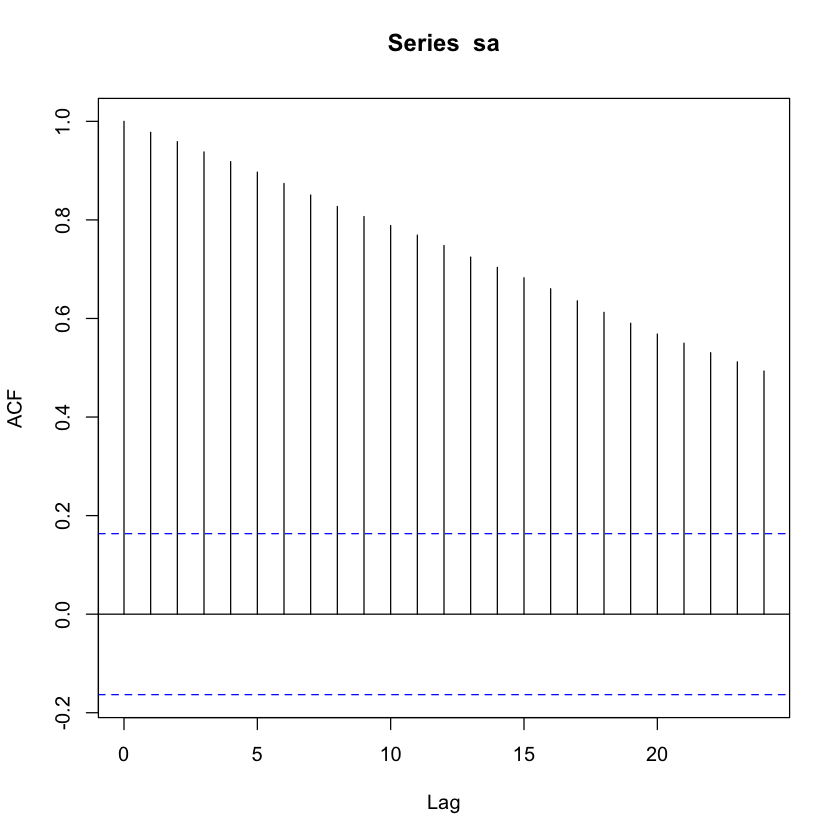

In [55]:
plot(Acf(sa))

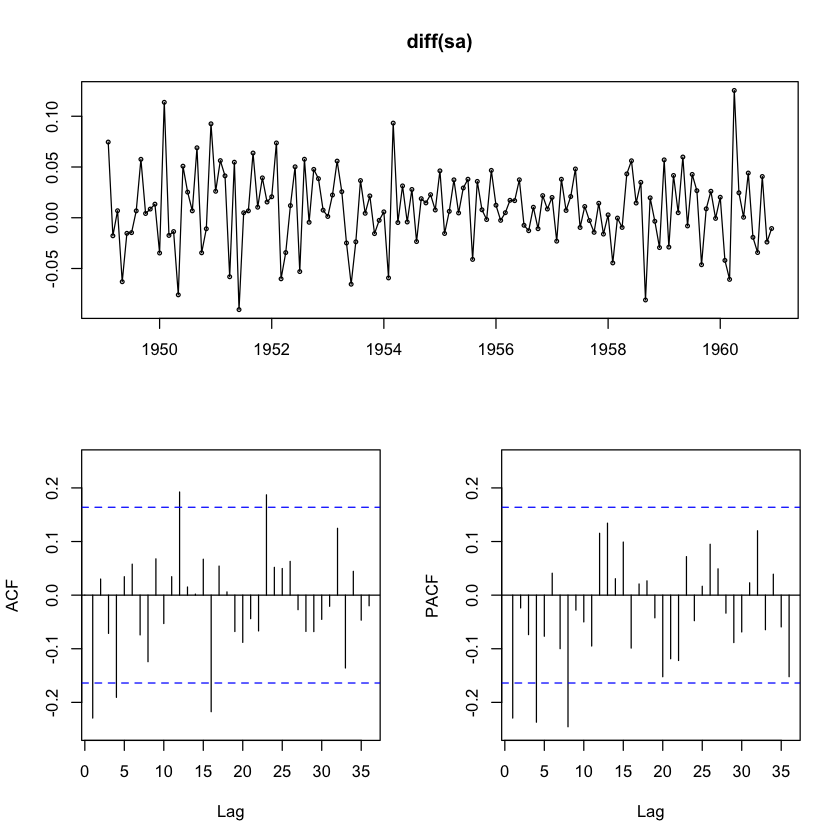

In [62]:
tsdisplay(diff(sa))

In [138]:
adf.test(ap, alternative="stationary")

Warning message in adf.test(ap, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  ap
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


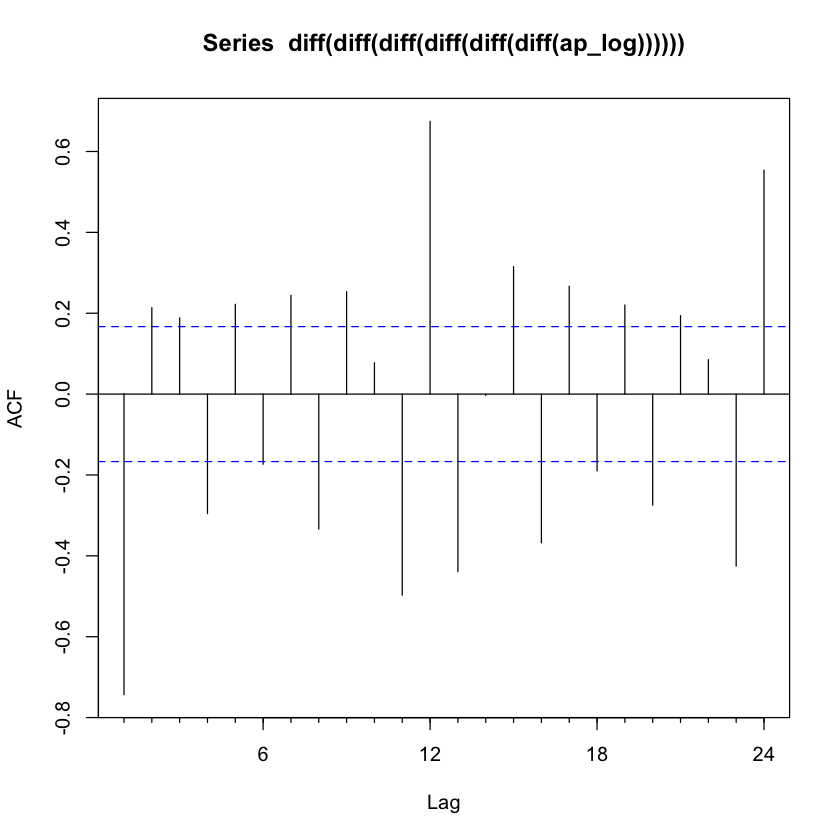

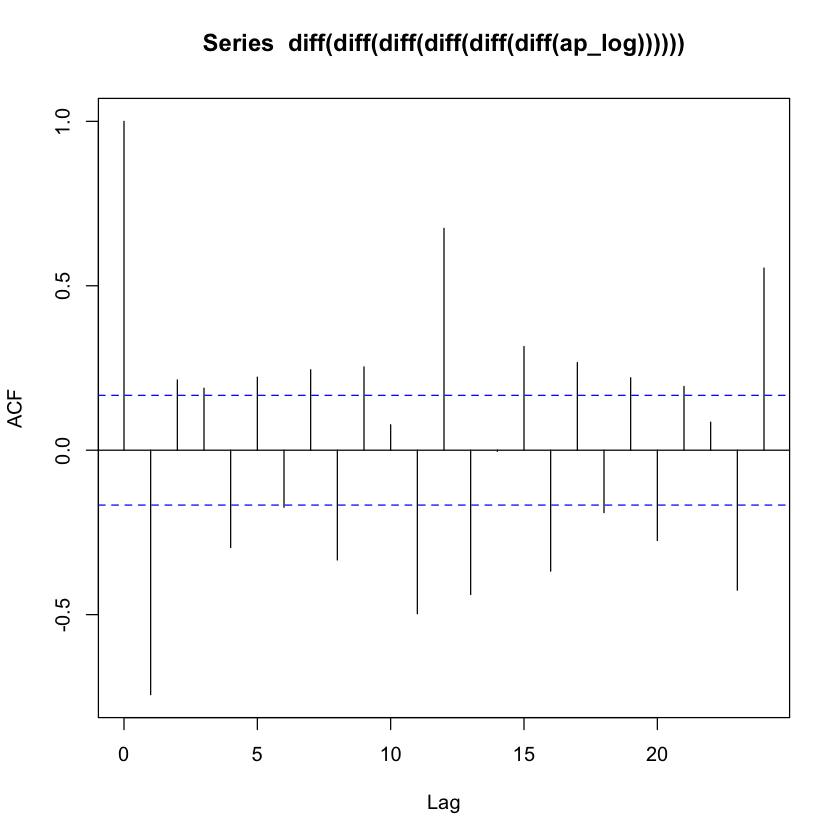

In [87]:
plot(Acf(diff(diff(diff(diff(diff(diff(ap_log))))))))

In [73]:
aa = Arima(sa, order=c(5, 0, 0))

In [74]:
summary(aa)

Series: sa 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
         ar1     ar2      ar3      ar4     ar5  intercept
      0.8544  0.2244  -0.0790  -0.1231  0.1219     5.5077
s.e.  0.0837  0.1100   0.1116   0.1109  0.0844     0.6170

sigma^2 estimated as 0.001458:  log likelihood=266.05
AIC=-518.11   AICc=-517.29   BIC=-497.32

Training set error measures:
                     ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.01094754 0.03737961 0.02903879 0.1961086 0.5320043 0.2399067
                   ACF1
Training set -0.1045514


In [75]:
aa3 = Arima(sa, order=c(3, 0, 0))

In [76]:
summary(aa3)

Series: sa 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2      ar3  intercept
      0.8512  0.2168  -0.0696     5.4808
s.e.  0.0841  0.1093   0.0842     0.6040

sigma^2 estimated as 0.001459:  log likelihood=265
AIC=-520   AICc=-519.56   BIC=-505.15

Training set error measures:
                      ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.009977675 0.03766805 0.02936873 0.1784521 0.5381289 0.2426325
                    ACF1
Training set -0.09171782


In [89]:
aa51 = Arima(sa, order=c(5,5,0))

In [81]:
summary(aa51)

Series: sa 
ARIMA(5,5,0)                    

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -2.2737  -2.7388  -2.1443  -1.1349  -0.3426
s.e.   0.0159   0.0381   0.0429   0.0370   0.0165

sigma^2 estimated as 0.00918:  log likelihood=126.6
AIC=-241.2   AICc=-240.56   BIC=-223.59

Training set error measures:
                       ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.0005560274 0.09242319 0.06953146 0.01291128 1.265996 0.5744406
                   ACF1
Training set -0.1803736


In [95]:
auto.arima(sa, seasonal=FALSE)

Series: sa 
ARIMA(2,1,1) with drift         

Coefficients:
         ar1     ar2      ma1   drift
      0.6220  0.1004  -0.9267  0.0098
s.e.  0.1145  0.1005   0.0781  0.0008

sigma^2 estimated as 0.001263:  log likelihood=276.13
AIC=-542.25   AICc=-541.82   BIC=-527.44

In [96]:
auto.arima(ap_log, seasonal=TRUE)

Series: ap_log 
ARIMA(0,1,1)(0,1,1)[12]                    

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001371:  log likelihood=244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

In [105]:
auto.arima(ap_log, c(1,1,1), seasonal=list(order=c(0,1,1), period=12))

Warning message in if (seasonal) m <- frequency(x) else m <- 1:
“the condition has length > 1 and only the first element will be used”

ERROR: Error in if (seasonal) m <- frequency(x) else m <- 1: argument is not interpretable as logical


In [114]:
fit <- Arima(log(AirPassengers), c(2, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

In [115]:
fit

Series: log(AirPassengers) 
ARIMA(2,1,1)(0,1,1)[12]                    

Coefficients:
         ar1     ar2      ma1     sma1
      0.5580  0.2470  -0.9646  -0.5574
s.e.  0.0955  0.0936   0.0469   0.0780

sigma^2 estimated as 0.00135:  log likelihood=246.14
AIC=-482.27   AICc=-481.79   BIC=-467.9

In [133]:
bf = auto.arima(ap_log)

In [121]:
bf

Series: ap 
ARIMA(0,1,1)(0,1,0)[12]                    

Coefficients:
          ma1
      -0.3184
s.e.   0.0877

sigma^2 estimated as 138.3:  log likelihood=-508.32
AIC=1020.64   AICc=1020.73   BIC=1026.39

In [134]:
future = forecast(bf, 24)

In [136]:
future_exp = forecast(aa, 24)

# Convert Mean back
future_exp$mean = exp(future_exp$mean)
# Convert Upper back
future_exp$upper = exp(future_exp$upper)
# Convert Lower back
future_exp$lower = exp(future_exp$lower)
# Convert Original ts back
future_exp$x=exp(future_exp$x)

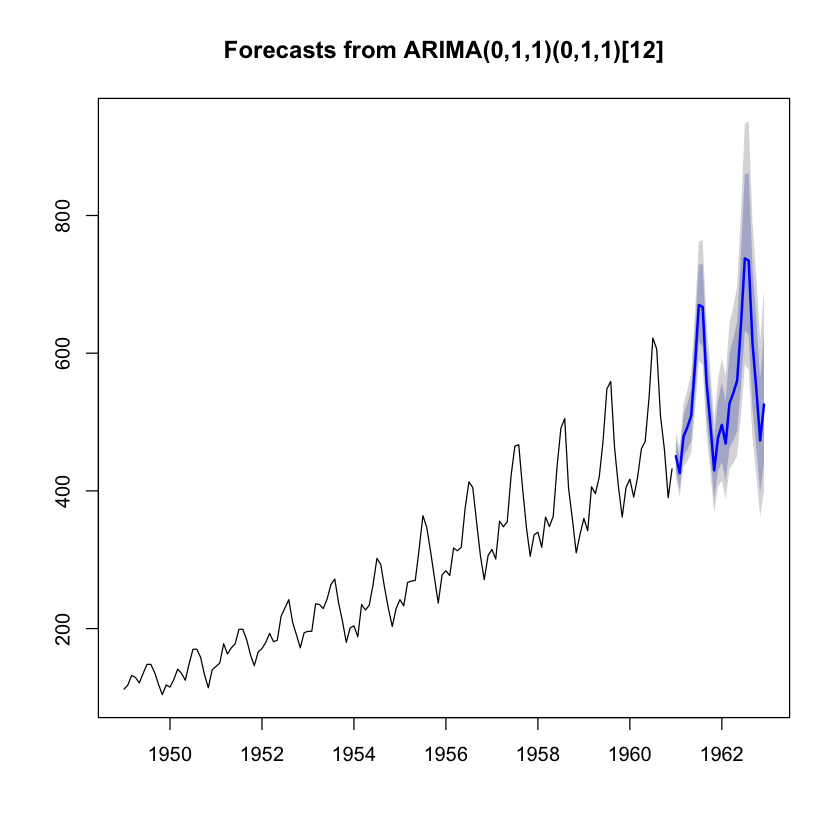

In [137]:
plot(future_exp)